## Installing and Importing Libraries

In [1]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Importing Dataset

#### Downloading via kagglehub

##### Salary Dataset

In [3]:
path1 = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
print("Path to dataset files:", path1)
csv_file1 = os.path.join(path1, 'Salary_dataset.csv')
data_reg = pd.read_csv(csv_file1)

Path to dataset files: C:\Users\kalat\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


##### Student Performance Dataset

In [4]:
path3 = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", path3)
csv_file3 = os.path.join(path3, 'Student_Performance.csv')
data_multi_reg = pd.read_csv(csv_file3)

Path to dataset files: C:\Users\kalat\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1


##### Diabetes Dataset

In [5]:
path2 = kagglehub.dataset_download("ankushpanday1/diabetes-prediction-in-india-dataset")
print("Path to dataset files:", path2)
csv_file2 = os.path.join(path2, 'diabetes_prediction_india (1).csv')
data_diabetes_org = pd.read_csv(csv_file2)

Path to dataset files: C:\Users\kalat\.cache\kagglehub\datasets\ankushpanday1\diabetes-prediction-in-india-dataset\versions\1


#### Download directly from the website
###### Diabetes dataset --> https://www.kaggle.com/datasets/ankushpanday1/diabetes-prediction-in-india-dataset
###### Salary Dataset           --> https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
###### Student Performance      --> https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

## Simple Linear Regression

In [6]:
line_reg_data = data_reg.copy()

In [7]:
line_reg_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
X = data_reg['YearsExperience']
y = data_reg['Salary']

#### Developing from scratch

In [9]:
X_mean = X.mean()
print('X Mean :', X_mean)

y_mean = y.mean()
print('y Mean :', y_mean)

X Mean : 5.413333333333332
y Mean : 76004.0


In [10]:
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
print('Slope     :',slope)
intercept = y_mean - slope * X_mean
print('Intercept :', intercept)

Slope     : 9449.962321455076
Intercept : 24848.2039665232


In [11]:
y_pred = slope * X + intercept

In [12]:
slope * 1.6 + intercept

39968.143680851324

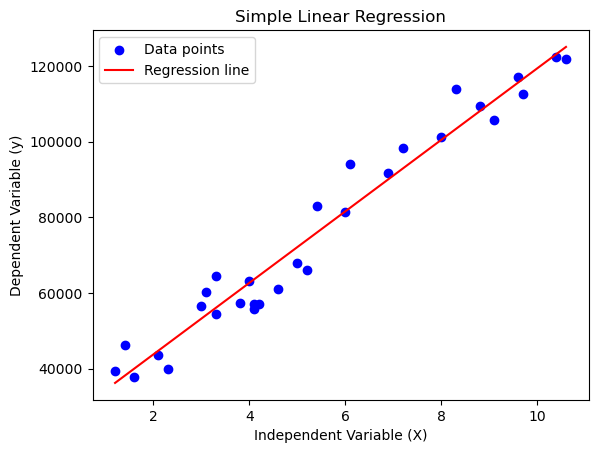

In [13]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

#### using sklearn.linear_model.LinearRegression

In [14]:
X = data_reg[['YearsExperience']]
y = data_reg['Salary']

model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

In [15]:
y_preddd = model_reg.predict(X)

In [16]:
print(model_reg.predict([[1.6]]))

[39968.14368085]


C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


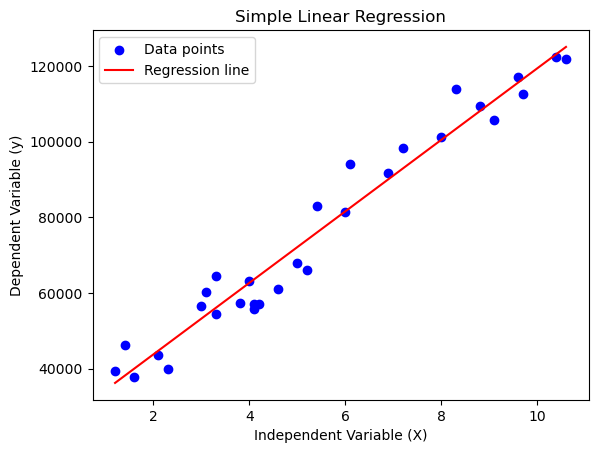

In [17]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

#### Directly Visualizing using seaborn.regplot()

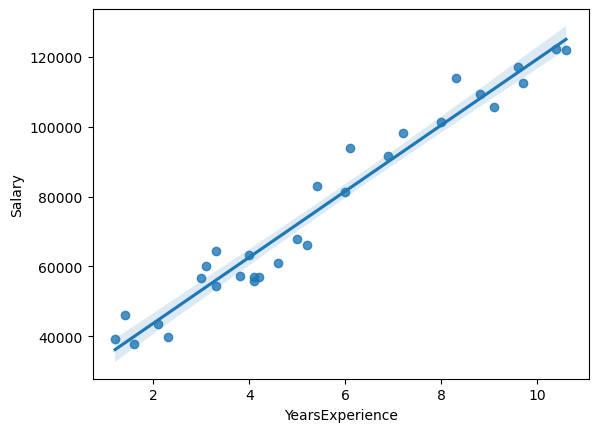

In [18]:
sns.regplot(x = X, y = y)
plt.show()

## Multiple Linear Regression

In [19]:
data_multi_reg.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [20]:
X_multi = data_multi_reg[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y_multi = data_multi_reg['Performance Index']

In [21]:
model_multi = LinearRegression() 
model_multi.fit(X_multi, y_multi)

LinearRegression()

In [22]:
intercept = model_multi.intercept_
coefficients = model_multi.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -33.76372609079506
Coefficients: [2.85342921 1.01858354 0.47633298 0.1951983 ]


In [23]:
y_pred_multi = model_multi.predict(X_multi)

In [24]:
print(model_multi.predict([[7, 99, 9, 1]]))
print(model_multi.predict([[7, 75, 8, 5]]))

[91.53224386]
[67.39069914]


C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Logistic Regression

In [25]:
data_diabetes = data_diabetes_org.copy()

In [26]:
data_diabetes.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [27]:
label_encoder = LabelEncoder()

In [28]:
columns_to_encode = ['Gender', 'Family_History', 'Physical_Activity','Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level', 'Hypertension']
for column in columns_to_encode :
    data_diabetes[column] = label_encoder.fit_transform(data_diabetes[column])

In [29]:
data_diabetes.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,1,35.5,0,0,0,2,2,2,1,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,2,28.7,1,2,0,0,1,0,0,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,2,30.0,1,0,0,0,1,0,1,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,0,25.6,0,2,2,1,1,0,1,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,1,38.8,0,0,0,0,0,0,0,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [30]:
X_diabetes = data_diabetes[['Age', 'Gender','BMI', 'Family_History', 'Physical_Activity','Diet_Type', 'Smoking_Status', 
                            'Alcohol_Intake', 'Stress_Level', 'Hypertension', 'Glucose_Tolerance_Test_Result', 'Vitamin_D_Level', 'C_Protein_Level']]
y_diabetes = data_diabetes['Diabetes_Status']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size = 0.3)

In [32]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred_logistic = model_logistic.predict(X_test)

In [34]:
print('Accuracy              :', accuracy_score(y_test, y_pred_logistic))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_logistic))
print('Classification Report :\n', classification_report(y_test, y_pred_logistic))

Accuracy              : 0.48677581863979846
Confusion Matrix      :
 [[342 404]
 [411 431]]
Classification Report :
               precision    recall  f1-score   support

          No       0.45      0.46      0.46       746
         Yes       0.52      0.51      0.51       842

    accuracy                           0.49      1588
   macro avg       0.49      0.49      0.49      1588
weighted avg       0.49      0.49      0.49      1588



## Decision Trees

In [35]:
data_diabetes_dt = data_diabetes_org.copy()
data_diabetes_dt.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [36]:
data_diabetes_dt.describe()

,Age,BMI,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Pregnancies,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000
mean,48.417989,27.459883,199.777098,124.940193,164.709902,8.226909,89.787415,0.949399,1.493386,135.011867,29.909883,5.258743
std,18.040544,7.194187,57.103759,32.091770,43.152803,2.179662,17.238430,0.144871,2.677414,37.541696,11.527951,2.754500
min,18.000000,15.000000,100.000000,70.000000,90.100000,4.500000,60.000000,0.700000,0.000000,70.100000,10.000000,0.500000
25%,33.000000,21.200000,151.100000,97.100000,128.175000,6.300000,75.000000,0.820000,0.000000,102.175000,20.000000,2.880000
50%,48.000000,27.400000,198.600000,124.050000,164.950000,8.200000,90.000000,0.950000,0.000000,136.000000,29.800000,5.270000
75%,64.000000,33.600000,249.100000,153.300000,201.000000,10.100000,105.000000,1.080000,2.000000,167.100000,39.900000,7.660000
max,79.000000,40.000000,300.000000,180.000000,240.000000,12.000000,119.000000,1.200000,9.000000,200.000000,50.000000,10.000000


In [37]:
data_diabetes_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     3512 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

In [38]:
data_diabetes_dt.isnull().sum()

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [39]:
data_diabetes_dt['Alcohol_Intake'] = data_diabetes_dt['Alcohol_Intake'].fillna('No Data Available')

In [40]:
data_diabetes_dt.isnull().sum()

Age                                  0
Gender                               0
BMI                                  0
Family_History                       0
Physical_Activity                    0
Diet_Type                            0
Smoking_Status                       0
Alcohol_Intake                       0
Stress_Level                         0
Hypertension                         0
Cholesterol_Level                    0
Fasting_Blood_Sugar                  0
Postprandial_Blood_Sugar             0
HBA1C                                0
Heart_Rate                           0
Waist_Hip_Ratio                      0
Urban_Rural                          0
Health_Insurance                     0
Regular_Checkups                     0
Medication_For_Chronic_Conditions    0
Pregnancies                          0
Polycystic_Ovary_Syndrome            0
Glucose_Tolerance_Test_Result        0
Vitamin_D_Level                      0
C_Protein_Level                      0
Thyroid_Condition        

In [41]:
columns_to_label = ['Gender', 'Family_History', 'Physical_Activity', 'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 
                   'Stress_Level', 'Hypertension', 'Urban_Rural', 'Health_Insurance', 'Regular_Checkups', 'Medication_For_Chronic_Conditions', 
                   'Polycystic_Ovary_Syndrome', 'Thyroid_Condition']

for column in columns_to_label :
    data_diabetes_dt[column] = label_encoder.fit_transform(data_diabetes_dt[column])

In [42]:
X_dt = data_diabetes_dt.drop("Diabetes_Status", axis=1)
y_dt = data_diabetes_dt["Diabetes_Status"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size = 0.3)

In [44]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 27, max_depth = 5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=27)

In [45]:
y_pred_dt = model_dt.predict(X_test)

In [46]:
print('Accuracy              :', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report :\n', classification_report(y_test, y_pred_dt))

Accuracy              : 0.4704030226700252
Confusion Matrix      :
 [[295 511]
 [330 452]]
Classification Report :
               precision    recall  f1-score   support

          No       0.47      0.37      0.41       806
         Yes       0.47      0.58      0.52       782

    accuracy                           0.47      1588
   macro avg       0.47      0.47      0.47      1588
weighted avg       0.47      0.47      0.46      1588



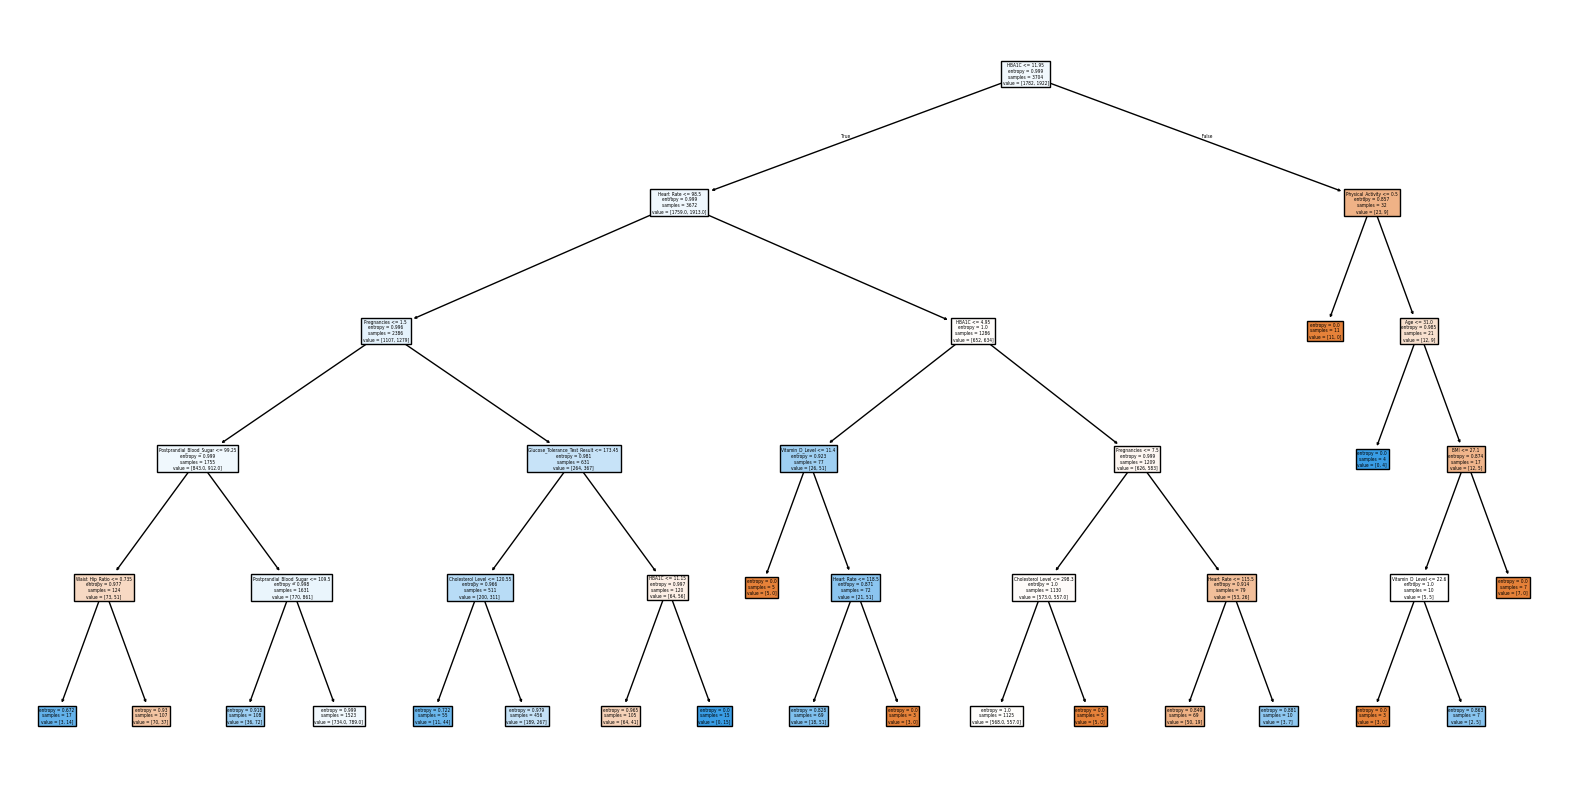

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X_dt.columns, filled=True)
plt.show()